<img src='images/cin-logo.png' style='width:600px;'>

# IF997- TÓPICOS AVANÇADOS EM SI 1
## Projeto Incognia

### Grupo: Alisson Diego, Guilherme Santiago, Pedro Sena

## Base de Dados

| coluna                               | tipo   | descrição                                                                                     |
|--------------------------------------|--------|-----------------------------------------------------------------------------------------------|
| id                                   | string | identificador do login                                                                        |
| account_id                           | string | identificador da conta                                                                        |
| device_id                            | string | identificador do dispositivo                                                                  |
| installation_id                      | string | identificador da instalação                                                                   |
| timestamp                            | long   | timestamp (unixtime - em ms)                                                                  |
| is_from_official_store               | bool   | se o app utilizado foi instalado através de uma loja oficial                                  |
| is_emulator                          | bool   | uso de emulador                                                                               |
| has_fake_location_app                | bool   | se o dispositivo possui aplicação de geração localizações falsas                              |
| has_fake_location_enable             | bool   | se o dispositivo habilitou geração de localizações falsas                                     |
| probable_root                        | bool   | provável root do sistema                                                                      |
| device_age_ms                        | long   | idade do dispositivo (em ms)                                                                  |
| max_installations_on_related_devices | int    | quantidade máxima de instalações dos dispositivos associados à conta                          |
| never_permited_location_on_account   | bool   | se o dispositivo nunca habilitou coleta de localizações, quando outros dispositivos o fizeram |
| boot_count                           | int    | quantidade de reinicializações do dispositivo                                                 |
| wallpaper_count                      | int    | quantidade de wallpapers do dispositivo                                                       |
| n_accounts                           | int    | número de contas acessadas pelo dispositivo                                                   |
| ato                                  | bool   | se login está associado a um evento de account takeover                                       |

## Bibliotecas utilizadas

- datetime
- matplotlib
- numpy
- pandas


In [184]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set()
%matplotlib inline
COLOR = 'black'
WEIGHT = "bold"
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.weight'] = WEIGHT
plt.rcParams['axes.titleweight'] = WEIGHT

## 1. Normalização

In [76]:
logins_df = pd.read_parquet('./dataset/logins.parquet4')
print(logins_df.info())
logins_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5418786 entries, 0 to 5418785
Data columns (total 17 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   id                                    object 
 1   account_id                            object 
 2   device_id                             object 
 3   installation_id                       object 
 4   timestamp                             float64
 5   is_from_official_store                float64
 6   is_emulator                           float64
 7   has_fake_location_app                 float64
 8   has_fake_location_enabled             float64
 9   probable_root                         float64
 10  device_age_ms                         float64
 11  max_installations_on_related_devices  float64
 12  never_permitted_location_on_account   float64
 13  boot_count                            float64
 14  wallpaper_count                       float64
 15  n_accounts     

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1.621290e+12,1.0,0.0,0.0,0.0,0.0,1.407468e+09,1.0,0.0,129.0,28.0,1.0,0.0
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1.620309e+12,1.0,0.0,0.0,0.0,0.0,1.622747e+10,2.0,0.0,131.0,224.0,1.0,0.0
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.625228e+12,1.0,0.0,0.0,0.0,0.0,2.865500e+10,2.0,0.0,179.0,6.0,1.0,0.0
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1.624645e+12,1.0,0.0,0.0,0.0,0.0,2.484419e+10,3.0,0.0,38.0,11.0,1.0,0.0
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.619907e+12,1.0,0.0,0.0,0.0,0.0,2.334158e+10,2.0,0.0,NaN,NaN,1.0,0.0


### 1.1 Remover linhas nulas

In [77]:
lista_colunas = ['id', 'account_id', 'device_id', 'installation_id']
null_ids = np.where(logins_df[lista_colunas].isnull())[0]

lista_id = []
for id in null_ids:
  if id not in lista_id:
    lista_id.append(id)

logins_df.drop(inplace=True, index=lista_id)

null_n_accounts = logins_df[logins_df['n_accounts'].isnull()]
logins_df.drop(index=null_n_accounts.index, inplace=True)

### 1.2 Remover colunas

In [78]:
logins_df.drop('wallpaper_count', axis=1, inplace=True)
logins_df.drop('boot_count', axis=1, inplace=True)

logins_df.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,n_accounts,ato
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1.621290e+12,1.0,0.0,0.0,0.0,0.0,1.407468e+09,1.0,0.0,1.0,0.0
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1.620309e+12,1.0,0.0,0.0,0.0,0.0,1.622747e+10,2.0,0.0,1.0,0.0
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.625228e+12,1.0,0.0,0.0,0.0,0.0,2.865500e+10,2.0,0.0,1.0,0.0
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1.624645e+12,1.0,0.0,0.0,0.0,0.0,2.484419e+10,3.0,0.0,1.0,0.0
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.619907e+12,1.0,0.0,0.0,0.0,0.0,2.334158e+10,2.0,0.0,1.0,0.0


### 1.3 Preencher valores nulos

In [79]:
moda_timestamp = logins_df['timestamp'].mode()[0]
moda_device_age = logins_df['device_age_ms'].mode()[0]
lista_colunas = [ 
  'never_permitted_location_on_account', 
  'max_installations_on_related_devices', 
  'is_from_official_store', 
  'is_emulator', 
  'has_fake_location_app', 
  'has_fake_location_enabled', 
  'probable_root', 
  'max_installations_on_related_devices', 
  'has_fake_location_enabled',
  'probable_root',
  'is_from_official_store',
  'never_permitted_location_on_account',
]

logins_df['timestamp'] = logins_df['timestamp'].fillna(moda_timestamp)
logins_df['device_age_ms'] = logins_df['device_age_ms'].fillna(moda_device_age)

for coluna in lista_colunas:
  logins_df[coluna] = logins_df[coluna].fillna(0)

### 1.4 Conversão de tipos

In [80]:
lista_colunas = [*lista_colunas, 'n_accounts', 'ato']
logins_df[lista_colunas] = logins_df[lista_colunas].astype('int32')
contas = len(logins_df['account_id'].unique())
dispostivos = len(logins_df['device_id'].unique())
tentativas_ato = logins_df[logins_df['ato'] == 1].count()

print ('Acessos:', logins_df.shape[0])
print ('Contas:', contas)
print('Dispositivos:', dispostivos)
print('Tentativas de ATO:', tentativas_ato['ato'])
print('---------------------------------------')
print(logins_df.info())
logins_df.head()

Acessos: 5162049
Contas: 305889
Dispositivos: 364675
Tentativas de ATO: 2019
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5162049 entries, 0 to 5418785
Data columns (total 15 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   id                                    object 
 1   account_id                            object 
 2   device_id                             object 
 3   installation_id                       object 
 4   timestamp                             float64
 5   is_from_official_store                int32  
 6   is_emulator                           int32  
 7   has_fake_location_app                 int32  
 8   has_fake_location_enabled             int32  
 9   probable_root                         int32  
 10  device_age_ms                         float64
 11  max_installations_on_related_devices  int32  
 12  never_permitted_location_on_account   int32  
 13  

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,n_accounts,ato
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1.621290e+12,1,0,0,0,0,1.407468e+09,1,0,1,0
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1.620309e+12,1,0,0,0,0,1.622747e+10,2,0,1,0
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.625228e+12,1,0,0,0,0,2.865500e+10,2,0,1,0
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1.624645e+12,1,0,0,0,0,2.484419e+10,3,0,1,0
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.619907e+12,1,0,0,0,0,2.334158e+10,2,0,1,0


## 2. Criar novas colunas

In [81]:
def converteData(timestamp_ms):
  timestamp_sec = timestamp_ms / 1000
  data = datetime.fromtimestamp(timestamp_sec)
  return data

def converteIdade(idade_ms):
  idade_sec = idade_ms / 1000
  return int(idade_sec / 86400)

def adicionaColunaNContas(x):
  if  x > 1:
    return 1
  return 0

def adicionaColunaAtoComRoot(linha):
  if linha['probable_root'] == 1 and linha['ato'] == 1:
    return 1
  return 0

def adicionaColunaLojaAto(linha):
  if linha['is_from_official_store'] == 1 and linha['ato'] == 1:
    return 1
  return 0

In [118]:
contas = logins_df.groupby('account_id')
logins = contas.size().reset_index(name='n_logins')
ato = logins_df[logins_df['ato'] == 1].groupby('account_id')['ato'].size().reset_index(name='total_ato')
dispositivos = logins_df.groupby('account_id')['device_id'].nunique().reset_index(name='n_devices')

contas_df = pd.merge(logins, ato, on='account_id', how='inner')
contas_df = pd.merge(contas_df, dispositivos, on='account_id', how='inner')
contas_df.head()


,account_id,n_logins,total_ato,n_devices
0,+JQNTHY3SVkjZa9E,5,3,3
1,+KvSEhmVCaSFyjRI,2,1,2
2,+Vm4gf9+C/Gw+1Bl,1,1,1
3,+W0hBDSHLAu4u79B,3,3,1
4,+c7aThCN4Ko0uhw9,51,6,3


In [83]:
#Novas colunas
logins_df['timestamp'] = logins_df['timestamp'].apply(converteData)
logins_df['device_age_days'] = logins_df['device_age_ms'].apply(converteIdade)
logins_df['probable_root_ato'] = logins_df.apply(lambda x: adicionaColunaAtoComRoot(x), axis=1)
logins_df['is_from_official_store_ato'] = logins_df.apply(lambda x: adicionaColunaLojaAto(x), axis=1)

logins_df.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,n_accounts,ato,device_age_days,probable_root_ato,is_from_official_store_ato
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,2021-05-17 19:25:37.164,1,0,0,0,0,1.407468e+09,1,0,1,0,16,0,0
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,2021-05-06 10:48:57.125,1,0,0,0,0,1.622747e+10,2,0,1,0,187,0,0
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,2021-07-02 09:11:39.844,1,0,0,0,0,2.865500e+10,2,0,1,0,331,0,0
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,2021-06-25 15:24:27.436,1,0,0,0,0,2.484419e+10,3,0,1,0,287,0,0
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,2021-05-01 19:02:04.663,1,0,0,0,0,2.334158e+10,2,0,1,0,270,0,0


In [12]:
logins_df.to_parquet("./dataset/new_logins.parquet4")
contas_df.to_parquet("./dataset/contas.parquet4")

## 3. Gráficos

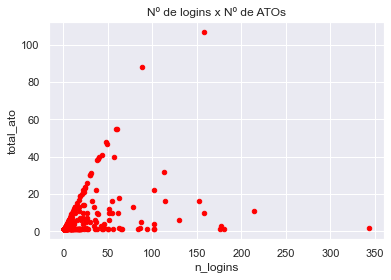

In [135]:
contas_df.plot(kind='scatter', x='n_logins', y='total_ato', color='red')
plt.title('Nº de logins x Nº de ATOs')
plt.show()


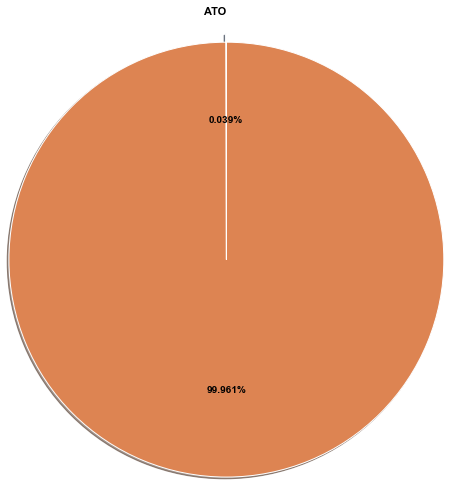

In [183]:
ato = logins_df[logins_df['ato'] == 1].count()[0]
not_ato = logins_df[logins_df['ato'] == 0].count()[0]

plt.pie([ato, not_ato], shadow=True, startangle=90, explode=[0.1,0], labels=['ATO', ''], autopct='%1.3f%%', radius=2.5)
plt.show()

In [193]:
# sns.pairplot(contas_df, hue='n_devices')
logins_df.groupby('device_age_days')['id'].count()

device_age_days
0       204850
1        40107
2        33579
3        30460
4        33942
         ...  
4161         1
4393         1
4573         1
4807         1
6124         1
Name: id, Length: 563, dtype: int64

In [162]:
#Gráfico de idades de dispositivos
colunasIdadesValores = new_dataframe['device_age_ms'].apply(transformaParaAno)
valoresIdades = [pegarQuantidadeOcorrencias(colunasIdadesValores, 1), pegarQuantidadeOcorrencias(colunasIdadesValores, 2)]
colunasIdades = ['Menos de 1 ano', 'Mais de 1 ano']
cores = ["#03cafc", "#d12a48"]

plotlib.pie(valoresIdades, labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0])
plotlib.show()

NameError: name 'new_dataframe' is not defined

338
321132


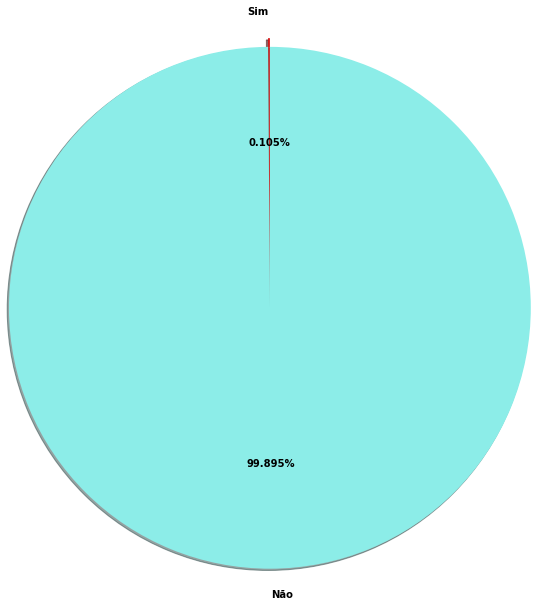

In [ ]:
#1. Tem alguma relação entre a conta estar associada a ato e ela ser acessada por mais de um dispositivo diferente?

valoresAtoComVariosAcessos = relacaoAtoVariosAcessos(new_dataframe)
colunasIdades = ['Sim', 'Não']
cores = ["#d60404", "#8cede8"]
print(valoresAtoComVariosAcessos[0])
print(valoresAtoComVariosAcessos[1])

plotlib.pie(valoresAtoComVariosAcessos, labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0], autopct='%1.3f%%', radius=3)
plotlib.show()

986
320484


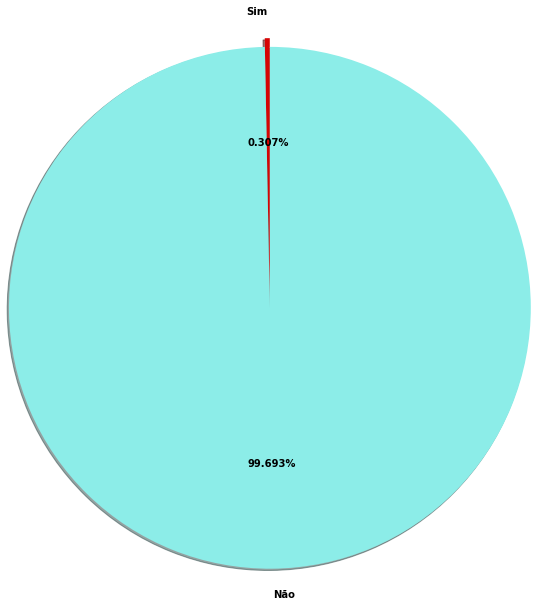

In [ ]:
#Coluna ATO
colunasATO = ['Sim', 'Não']
valoresAto = new_dataframe[['account_id', 'ato']].drop_duplicates(subset='account_id')
sim = valoresAto['ato']

sim = sim[valoresAto['ato'] == True].sum()
print(sim)
nao = valoresAto['ato'].shape[0] - int(sim)
print(nao)
cores = ["#d60404", "#8cede8"]

plotlib.pie([sim, nao], labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0], autopct='%1.3f%%', radius=3)
#plotlib.pie(valoresAtoComVariosAcessos, labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0], autopct='%1.3f%%', radius=3)
plotlib.show()